## Homework 1 - Time Series Analysis - EDS 296

**Marina Kochuten - Spring 2025**

Plotting historic and projected surface air temperature from 1850-2100 in the Aleutian Island Archipelago

### Locate monthly data for a historical simulation run

In [1]:
# Import packages
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np
import pandas as pd
import cftime

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Search through catalog, find all historical simulations
# ("activity_id=CMIP", "experiment_id=historical")
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

# Get unique model names in the set of search results
models = res_df.source_id.unique()

# Print list of model names
print(models)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


In [3]:
# Search through catalog, find all historical simulations with CMCC-ESM2 and CanESM5
res = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CMCC-ESM2")
res2 = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CanESM5")

# Convert to a data frame
res_df = res.df
res2_df = res2.df

# Print all unique ensemble members ("member_id")
members = res_df.member_id.unique()
members2 = res2_df.member_id.unique()

print(members)
print(members2)

['r1i1p1f1']
['r24i1p1f1' 'r25i1p1f1' 'r14i1p1f1' 'r2i1p1f1' 'r17i1p1f1' 'r10i1p1f1'
 'r13i1p1f1' 'r7i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r3i1p1f1' 'r22i1p1f1'
 'r23i1p1f1' 'r8i1p1f1' 'r11i1p1f1' 'r12i1p1f1' 'r15i1p1f1' 'r19i1p1f1'
 'r16i1p1f1' 'r1i1p1f1' 'r9i1p1f1' 'r18i1p1f1' 'r4i1p1f1' 'r21i1p1f1'
 'r20i1p1f1' 'r11i1p2f1' 'r10i1p2f1' 'r7i1p2f1' 'r9i1p2f1' 'r8i1p2f1'
 'r4i1p2f1' 'r40i1p2f1' 'r3i1p2f1' 'r6i1p2f1' 'r24i1p2f1' 'r13i1p2f1'
 'r12i1p2f1' 'r5i1p2f1' 'r31i1p2f1' 'r30i1p2f1' 'r32i1p2f1' 'r29i1p2f1'
 'r28i1p2f1' 'r2i1p2f1' 'r22i1p2f1' 'r23i1p2f1' 'r26i1p2f1' 'r27i1p2f1'
 'r25i1p2f1' 'r37i1p2f1' 'r38i1p2f1' 'r39i1p2f1' 'r35i1p2f1' 'r34i1p2f1'
 'r36i1p2f1' 'r33i1p2f1' 'r1i1p2f1' 'r18i1p2f1' 'r19i1p2f1' 'r14i1p2f1'
 'r15i1p2f1' 'r17i1p2f1' 'r16i1p2f1' 'r21i1p2f1' 'r20i1p2f1']


In [4]:
# activity_id: which project do you want? CMIP = historical data
activity_ids = ['CMIP'] 

# source_id: which model do you want? 
source_id = ['CMCC-ESM2']
source_id2 = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical']

# member_id: which ensemble member do you want? Here we want r1i1p1f1
member_id = ['r1i1p1f1']

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = ['Amon'] 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = ['tas'] 

In [5]:
# Search through catalog, store results
res_cmcc = catalog.search(
    activity_id=activity_ids,
    source_id=source_id,
    experiment_id=experiment_ids,
    member_id=member_id,
    table_id=table_id,
    variable_id=variable_id
)

res_can = catalog.search(
    activity_id=activity_ids,
    source_id=source_id2,
    experiment_id=experiment_ids,
    member_id=member_id,
    table_id=table_id,
    variable_id=variable_id
)

display(res_cmcc.df)
display(res_can.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CMCC,CMCC-ESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-ESM2/histo...,NaN,20210114


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


## Download future and historical air surface temperature and precipitation for each model

In [6]:
# Specify search terms to query catalog for CanESM5 and CMCC-ESM2 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CMCC-ESM2']
source_id2 = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = ['r1i1p1f1']

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = ['Amon'] 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = ['tas'] 

In [7]:
# Search through catalog, store results
res_cmcc = catalog.search(
    activity_id=activity_ids,
    source_id=source_id,
    experiment_id=experiment_ids,
    member_id=member_id,
    table_id=table_id,
    variable_id=variable_id
)

res_can = catalog.search(
    activity_id=activity_ids,
    source_id=source_id2,
    experiment_id=experiment_ids,
    member_id=member_id,
    table_id=table_id,
    variable_id=variable_id
)

display(res_cmcc.df)
display(res_can.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CMCC,CMCC-ESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-ESM2/histo...,NaN,20210114
1,ScenarioMIP,CMCC,CMCC-ESM2,ssp126,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210126
2,ScenarioMIP,CMCC,CMCC-ESM2,ssp585,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210126
3,ScenarioMIP,CMCC,CMCC-ESM2,ssp245,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210129
4,ScenarioMIP,CMCC,CMCC-ESM2,ssp370,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210202


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp370,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [8]:
# Read in the historical data files
hist_cmcc = xr.open_zarr(res_cmcc.df['zstore'][0], storage_options={'anon': True})
hist_can = xr.open_zarr(res_can.df['zstore'][2], storage_options={'anon': True})

In [9]:
# Read in future data files - 2 per model
# ssp370
ssp370_cmcc = xr.open_zarr(res_cmcc.df['zstore'][4], storage_options={'anon': True})
ssp370_can = xr.open_zarr(res_can.df['zstore'][1], storage_options={'anon': True})

# ssp585
ssp585_cmcc = xr.open_zarr(res_cmcc.df['zstore'][2], storage_options={'anon': True})
ssp585_can = xr.open_zarr(res_can.df['zstore'][0], storage_options={'anon': True})

## Analyze Region - Aleutian Islands

Alaska's Aleutian Islands have a maritime climate characterized by consistently mild temperatures, heavy precipitation, dense fogs, and strong winds. WHAT CLIMATE CHANGE IMPACATS DO I EXPECT

In [10]:
# Concat historic and future data for cmcc model
cmcc_370_data = xr.concat([hist_cmcc, ssp370_cmcc], dim="time")
cmcc_585_data = xr.concat([hist_cmcc, ssp585_cmcc], dim="time")

# Concat historic and future data for can model
can_370_data = xr.concat([hist_can, ssp370_can], dim="time")
can_585_data = xr.concat([hist_can, ssp585_can], dim="time")

#### Subset data to region of interest

In [11]:
# Define min/max bounds for region of interest (Aleutians)
lat_min, lat_max = 51, 55
lon_min, lon_max = 163, 197

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
cmcc_370_lat = (cmcc_370_data.lat >= lat_min) & (cmcc_370_data.lat <= lat_max)
cmcc_370_lon = (cmcc_370_data.lon >= lon_min) & (cmcc_370_data.lon <= lon_max)

cmcc_585_lat = (cmcc_585_data.lat >= lat_min) & (cmcc_585_data.lat <= lat_max)
cmcc_585_lon = (cmcc_585_data.lon >= lon_min) & (cmcc_585_data.lon <= lon_max)

can_370_lat = (can_370_data.lat >= lat_min) & (can_370_data.lat <= lat_max)
can_370_lon = (can_370_data.lon >= lon_min) & (can_370_data.lon <= lon_max)

can_585_lat = (can_585_data.lat >= lat_min) & (can_585_data.lat <= lat_max)
can_585_lon = (can_585_data.lon >= lon_min) & (can_585_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
cmcc_370_bound = cmcc_370_data.where(cmcc_370_lat & cmcc_370_lon, drop=True)
cmcc_585_bound = cmcc_585_data.where(cmcc_585_lat & cmcc_585_lon, drop=True)
can_370_bound = can_370_data.where(can_370_lat & can_370_lon, drop=True)
can_585_bound = can_585_data.where(can_585_lat & can_585_lon, drop=True)

#### Compute weighted average for Aleutian Islands

In [12]:
# Define function to generate area weights
def weights(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [13]:
# Generate area weights for each scenario
weighted_cmcc_370 = weights(cmcc_370_bound)
weighted_cmcc_585 = weights(cmcc_585_bound)
weighted_can_370 = weights(can_370_bound)
weighted_can_585 = weights(can_585_bound)

# Average over lat, lon dimensions to get a time series
cmcc_370_bound = weighted_cmcc_370.mean(dim=["lat", "lon"])
cmcc_585_bound = weighted_cmcc_585.mean(dim=["lat", "lon"])
can_370_bound = weighted_can_370.mean(dim=["lat", "lon"])
can_585_bound = weighted_can_585.mean(dim=["lat", "lon"])

In [14]:
# Look into time for can_585 - seems to be mismatched with the other models
can_585_bound.time

<xarray.DataArray 'time' (time: 5412)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2300, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2300, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2300, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 2.0
  * time     (time) object 1850-01-16 12:00:00 ... 2300-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [15]:
# Subset time to match other models - 1850-2100
can_585_bound.time
can_585_bound = can_585_bound.where(can_585_bound.time <= cftime.DatetimeNoLeap(2100, 1, 1), drop=True)

# Check
can_585_bound.time

<xarray.DataArray 'time' (time: 3000)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2099, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2099, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2099, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 2.0
  * time     (time) object 1850-01-16 12:00:00 ... 2099-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [16]:
# Historic + Projected Trend Line Calculations

# Extract tas variable
cmcc_370_tas = cmcc_370_bound.tas
cmcc_585_tas = cmcc_585_bound.tas
can_370_tas = can_370_bound.tas
can_585_tas = can_585_bound.tas

# Calculate annual mean
annual_mean_cmcc_370 = cmcc_370_tas.groupby('time.year').mean(dim='time')
annual_mean_cmcc_585 = cmcc_585_tas.groupby('time.year').mean(dim='time')
annual_mean_can_370 = can_370_tas.groupby('time.year').mean(dim='time')
annual_mean_can_585 = can_585_tas.groupby('time.year').mean(dim='time')

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_cmcc_370 = np.polyfit(annual_mean_cmcc_370.year, annual_mean_cmcc_370, 1)
x_cmcc_585 = np.polyfit(annual_mean_cmcc_585.year, annual_mean_cmcc_585, 1)
x_can_370 = np.polyfit(annual_mean_can_370.year, annual_mean_can_370, 1)
x_can_585 = np.polyfit(annual_mean_can_585.year, annual_mean_can_585, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_cmcc_370 = np.poly1d(x_cmcc_370) 
trend_line_cmcc_585 = np.poly1d(x_cmcc_585) 
trend_line_can_370 = np.poly1d(x_can_370) 
trend_line_can_585 = np.poly1d(x_can_585) 

In [17]:
# Historic Trend Line Calculations

# subset to historic years
cmcc_hist_tas = cmcc_370_tas.where(cmcc_370_tas.time <= hist_cmcc.time.max(), drop = True)
can_hist_tas = can_370_tas.where(can_370_tas.time <= hist_can.time.max(), drop = True)

# Calculate annual mean
annual_mean_cmcc_hist = cmcc_hist_tas.groupby('time.year').mean(dim='time')
annual_mean_can_hist = can_hist_tas.groupby('time.year').mean(dim='time')

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_cmcc_hist = np.polyfit(annual_mean_cmcc_hist.year, annual_mean_cmcc_hist, 1)
x_can_hist = np.polyfit(annual_mean_can_hist.year, annual_mean_can_hist, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_cmcc_hist = np.poly1d(x_cmcc_hist) 
trend_line_can_hist = np.poly1d(x_can_hist) 

In [18]:
# Convert years for trend lines to datetime to be able to plot on same axes as monthly time
# cmcc_370_trend_years = pd.to_datetime(annual_mean_cmcc_370.year.astype(str))
# cmcc_585_trend_years = pd.to_datetime(annual_mean_cmcc_585.year.astype(str))
# can_370_trend_years = pd.to_datetime(annual_mean_can_370.year.astype(str))
# can_585_trend_years = pd.to_datetime(annual_mean_can_585.year.astype(str))


# Convert time to datetime64 format
# time = cmcc_370_data.time.astype('datetime64[ns]')

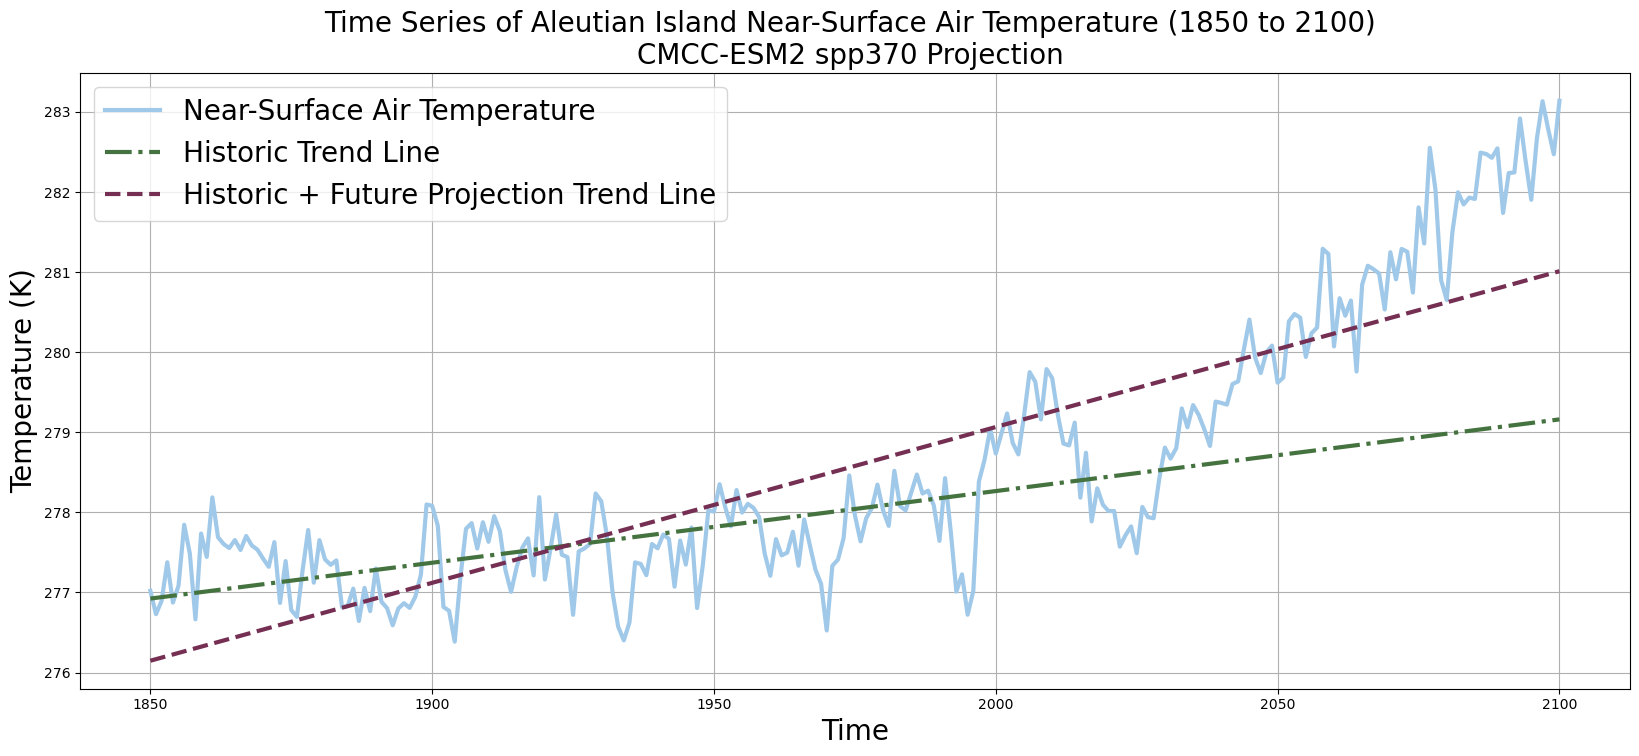

In [19]:
# cmcc370 time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean_cmcc_370.year, annual_mean_cmcc_370, label='Near-Surface Air Temperature', color='#A0C9E9', lw=3)

# trend - historic
ax.plot(annual_mean_cmcc_370.year, trend_line_cmcc_hist(annual_mean_cmcc_370.year), color='#45733F', linestyle='-.', lw=3, label=f'Historic Trend Line')

# trend - historic + projection
ax.plot(annual_mean_cmcc_370.year, trend_line_cmcc_370(annual_mean_cmcc_370.year), color='#742F53', linestyle='--', lw=3, label=f'Historic + Future Projection Trend Line')

# labels
ax.set_title("Time Series of Aleutian Island Near-Surface Air Temperature (1850 to 2100) \nCMCC-ESM2 spp370 Projection ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

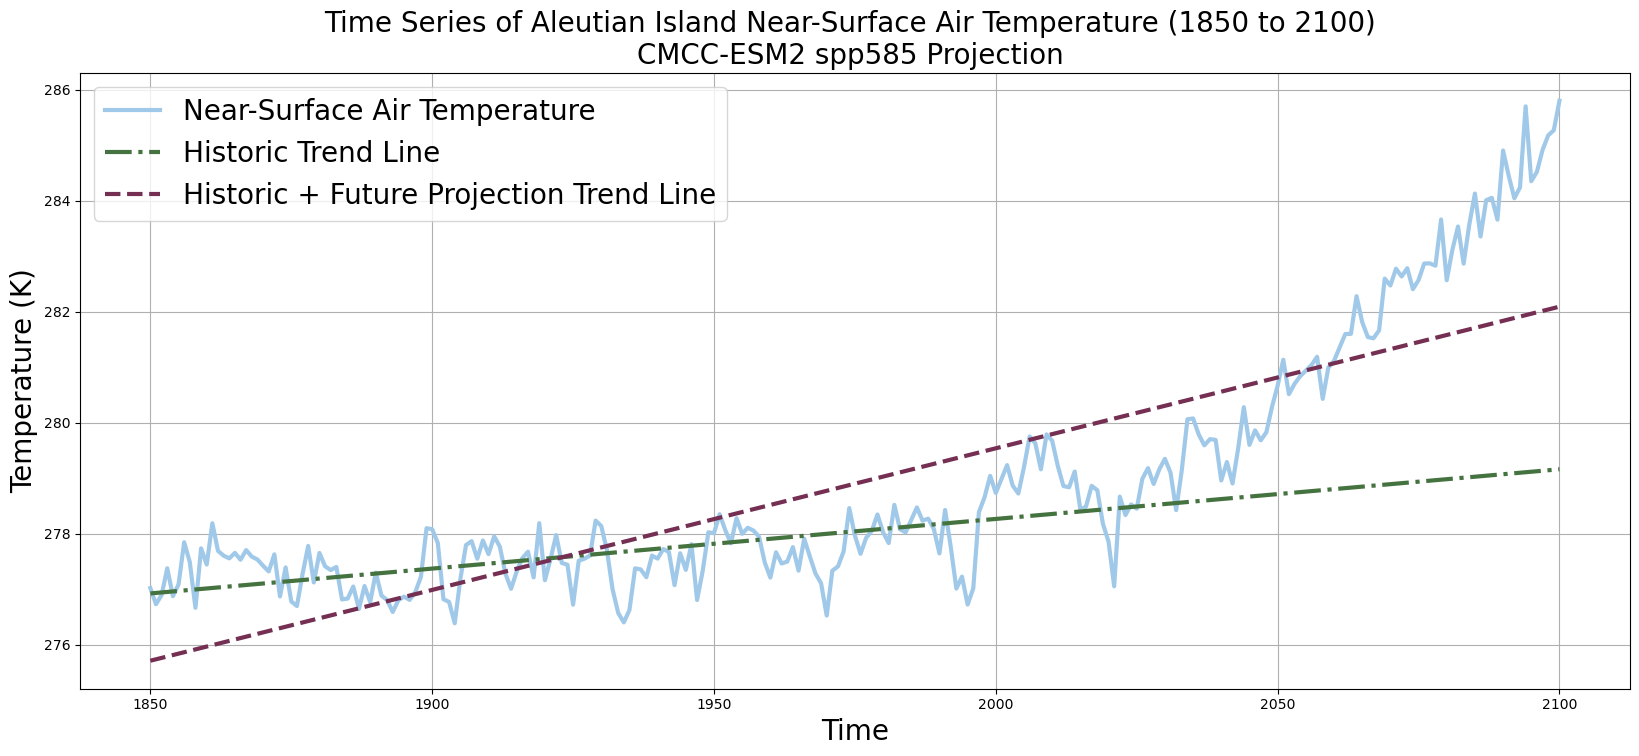

In [23]:
# cmcc585 time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean_cmcc_585.year, annual_mean_cmcc_585, label='Near-Surface Air Temperature', lw=3, color='#A0C9E9')

# trend - historic
ax.plot(annual_mean_cmcc_585.year, trend_line_cmcc_hist(annual_mean_cmcc_585.year), color='#45733F', linestyle='-.', lw=3, label=f'Historic Trend Line')

# trend - historic + projection
ax.plot(annual_mean_cmcc_585.year, trend_line_cmcc_585(annual_mean_cmcc_585.year), color='#742F53', linestyle='--', lw=3, label=f'Historic + Future Projection Trend Line')

# labels
ax.set_title("Time Series of Aleutian Island Near-Surface Air Temperature (1850 to 2100) \nCMCC-ESM2 spp585 Projection ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

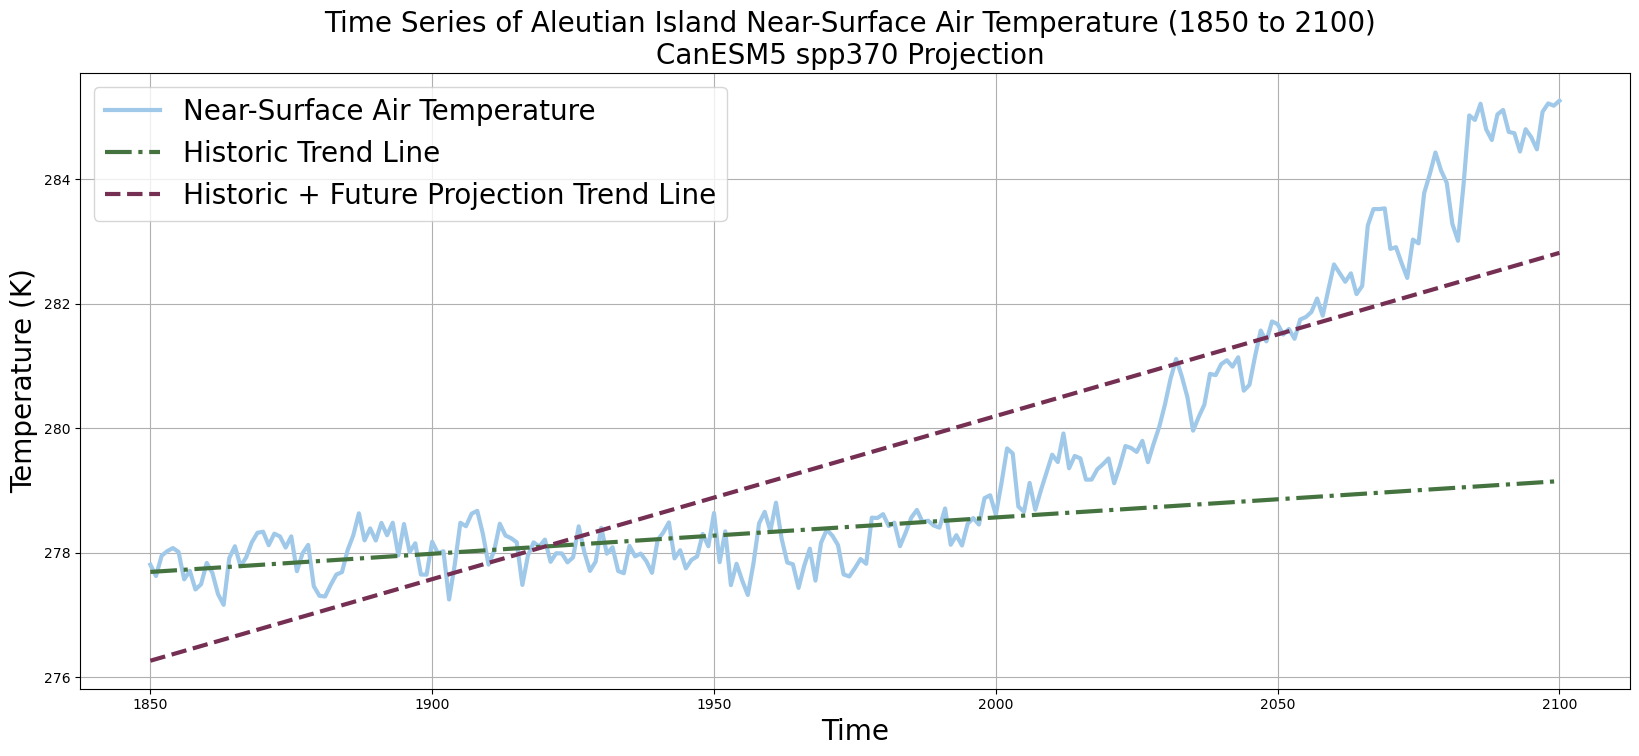

In [24]:
# can370 time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean_can_370.year, annual_mean_can_370, label='Near-Surface Air Temperature', lw=3, color='#A0C9E9')

# trend - historic
ax.plot(annual_mean_can_370.year, trend_line_can_hist(annual_mean_can_370.year), color='#45733F', linestyle='-.', lw=3, label=f'Historic Trend Line')

# trend - historic + projection
ax.plot(annual_mean_can_370.year, trend_line_can_370(annual_mean_can_370.year), color='#742F53', linestyle='--', lw=3, label=f'Historic + Future Projection Trend Line')

# labels
ax.set_title("Time Series of Aleutian Island Near-Surface Air Temperature (1850 to 2100) \nCanESM5 spp370 Projection ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

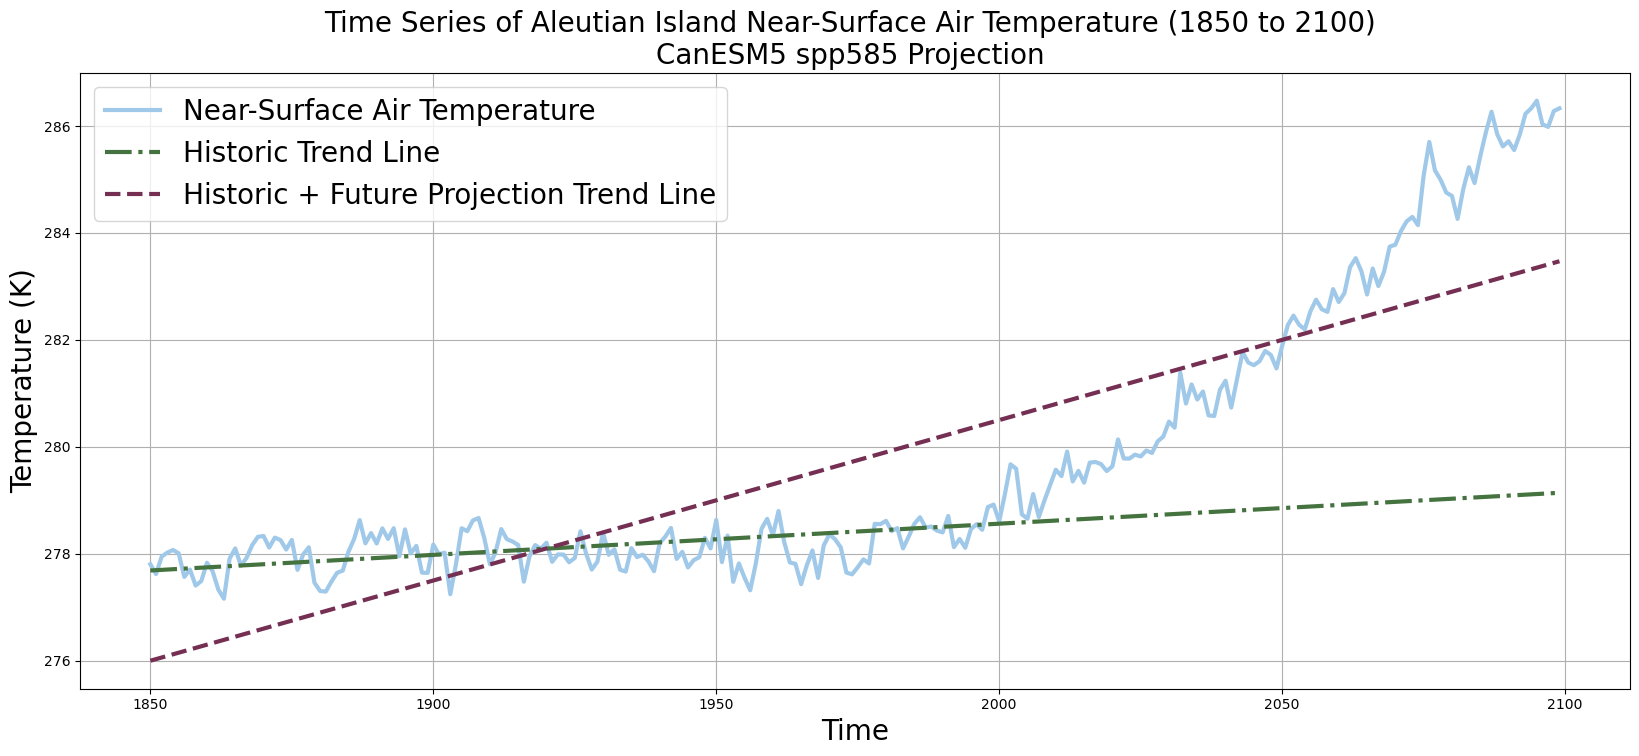

In [25]:
# can585 time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean_can_585.year, annual_mean_can_585, label='Near-Surface Air Temperature', lw=3, color='#A0C9E9')

# trend - historic
ax.plot(annual_mean_can_585.year, trend_line_can_hist(annual_mean_can_585.year), color='#45733F', linestyle='-.', lw=3, label=f'Historic Trend Line')

# trend - historic + projection
ax.plot(annual_mean_can_585.year, trend_line_can_585(annual_mean_can_585.year), color='#742F53', linestyle='--', lw=3, label=f'Historic + Future Projection Trend Line')

# labels
ax.set_title("Time Series of Aleutian Island Near-Surface Air Temperature (1850 to 2100) \nCanESM5 spp585 Projection ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()